# **Author - Kislay Karan**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN**

**GRIP @ The Sparks Foundation**

# **Task 3_ Retail _EDA ( Level : Beginner )**





Date : 21-12-2022

Datasets used: https://bit.ly/3i4rbWl

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
print(df.shape)
df.dtypes

(9994, 13)


Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
print(df.columns)
df.nunique()

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Checking the Missing and Values**

In [ ]:
#Checking for null value counts
null_value_counts=df.isnull().sum().sort_values(ascending=False)
null_value_counts

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
print(df.duplicated().sum())
df = df.drop_duplicates()

17


In [ ]:
#  summary statistics of the categorical variables
df.describe(include = "O")

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


In [ ]:
# entire dataset consists of only one country 'United states'
df = df.drop('Country',axis=1)

In [ ]:
#Unique Values of each Column -
for i in df[:]:
    print(i,":",df[i].unique())
    print("-"*100)

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
----------------------------------------------------------------------------------------------------
Segment : ['Consumer' 'Corporate' 'Home Office']
----------------------------------------------------------------------------------------------------
City : ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands

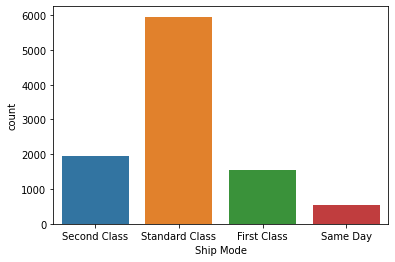

In [ ]:
sns.countplot(x='Ship Mode',data=df)
plt.show()

**Standard Class - Majoritarily**

**Same day - Least**

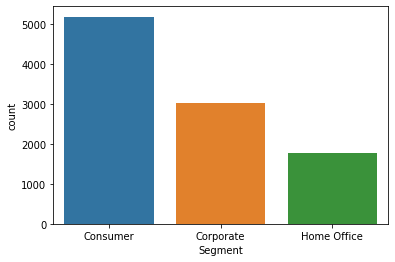

In [ ]:
sns.countplot(x='Segment',data=df)
plt.show()

**Consumer Segment are the ones who buy most**

In [ ]:
df_state=df['State'].value_counts()
df_state

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

**Each State has various count on products, with California having the highest(1996) and Wyoming with least(1)**

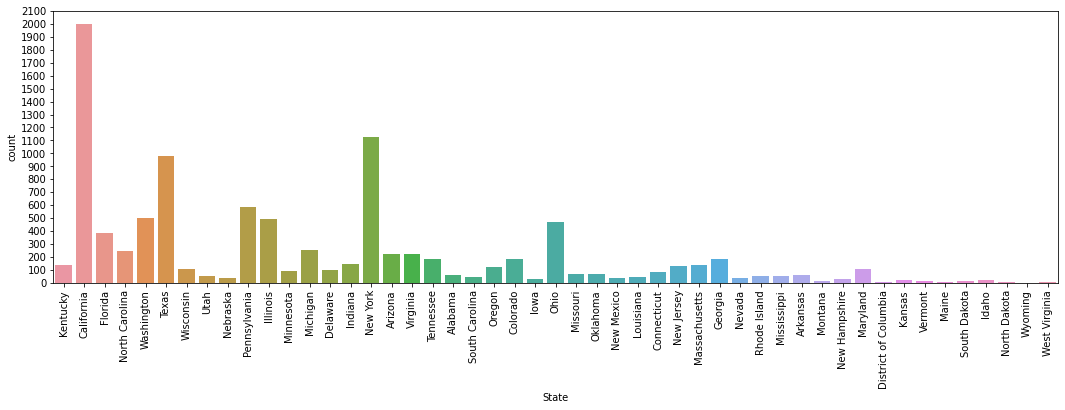

In [ ]:
plt.figure(figsize=[18,5])
sns.countplot(x='State',data=df)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,2200,100))
plt.show()

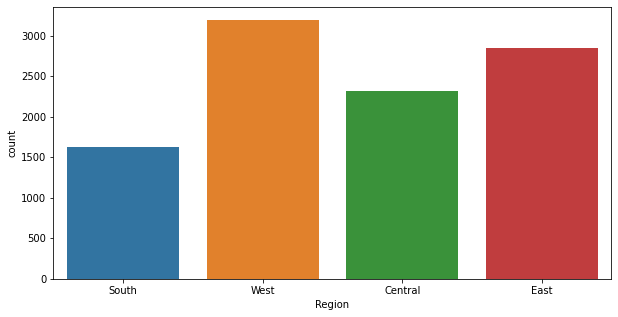

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x='Region',data=df)
plt.show()

**West Region having the Highest count of Products and South with Least.**

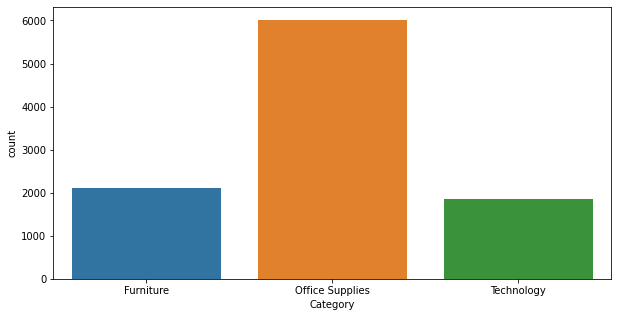

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x='Category',data=df)
plt.show()

**Office Supplies having the highest and Technology with least**

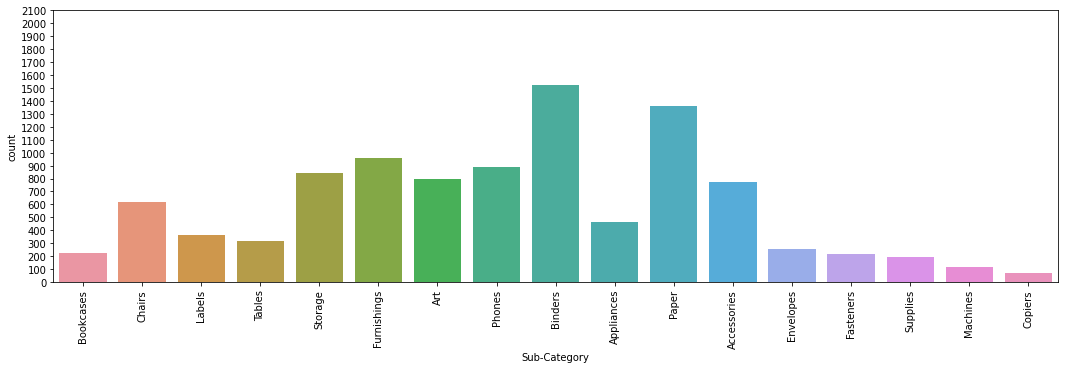

In [ ]:
plt.figure(figsize=[18,5])
sns.countplot(x='Sub-Category',data=df)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,2200,100))
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=[18,12]

**Each Sub-Category has various count on products, with Blinders followed by Paper**

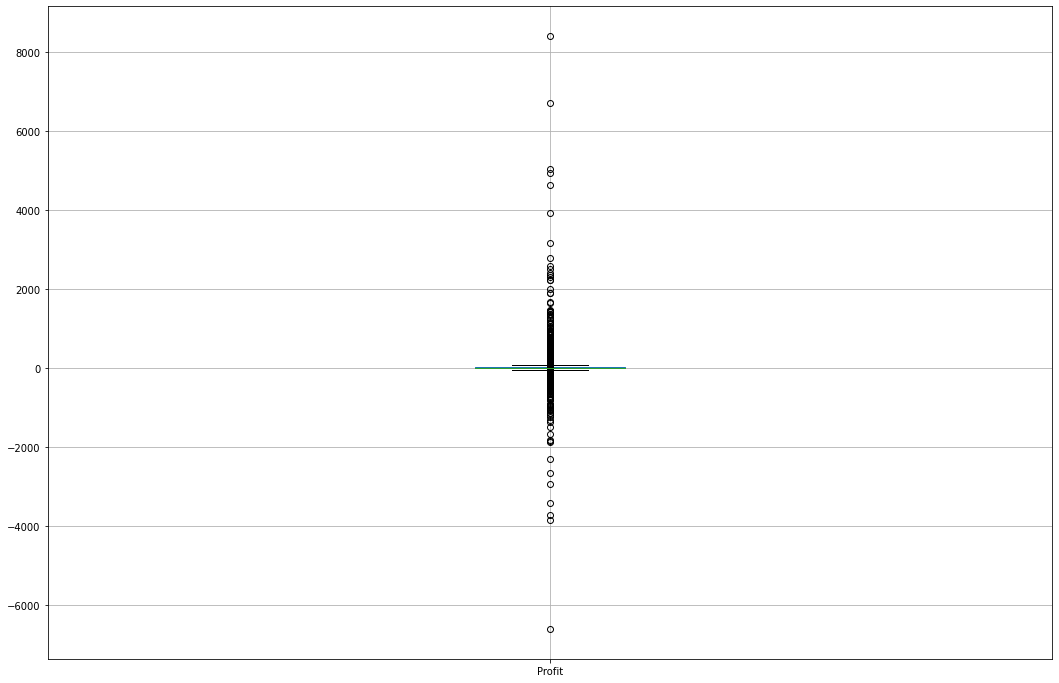

Value of Skewness: 7.554748459862763


In [ ]:
df.boxplot(column=['Profit'])
plt.show()
print("Value of Skewness:",df['Profit'].skew())

**Profit is very much skewed, with many outliers**
**usually skewness lies between -1 to +1.** 

**The data is heavily skewed in right direction.**

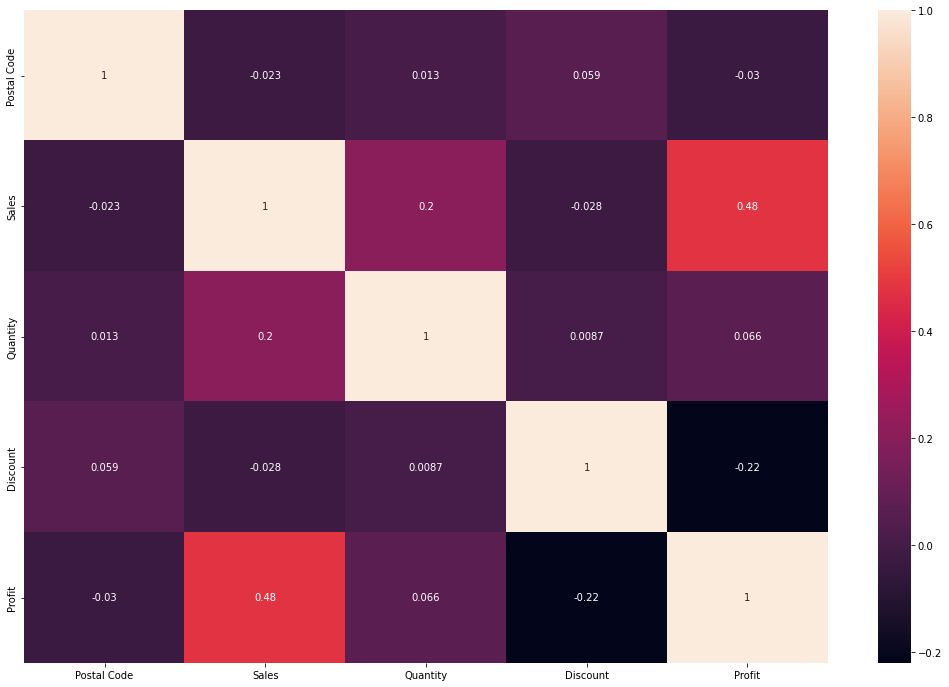

In [ ]:
crln=df.corr(method="pearson")
sns.heatmap(crln, xticklabels=crln.columns,yticklabels=crln.columns,annot=True)


**1.Profit and sales have very slight positive relation.**

**2. while Discount and Profit have negative relation.**

**Similarly with Discount and Sales, they have negative relation.** 

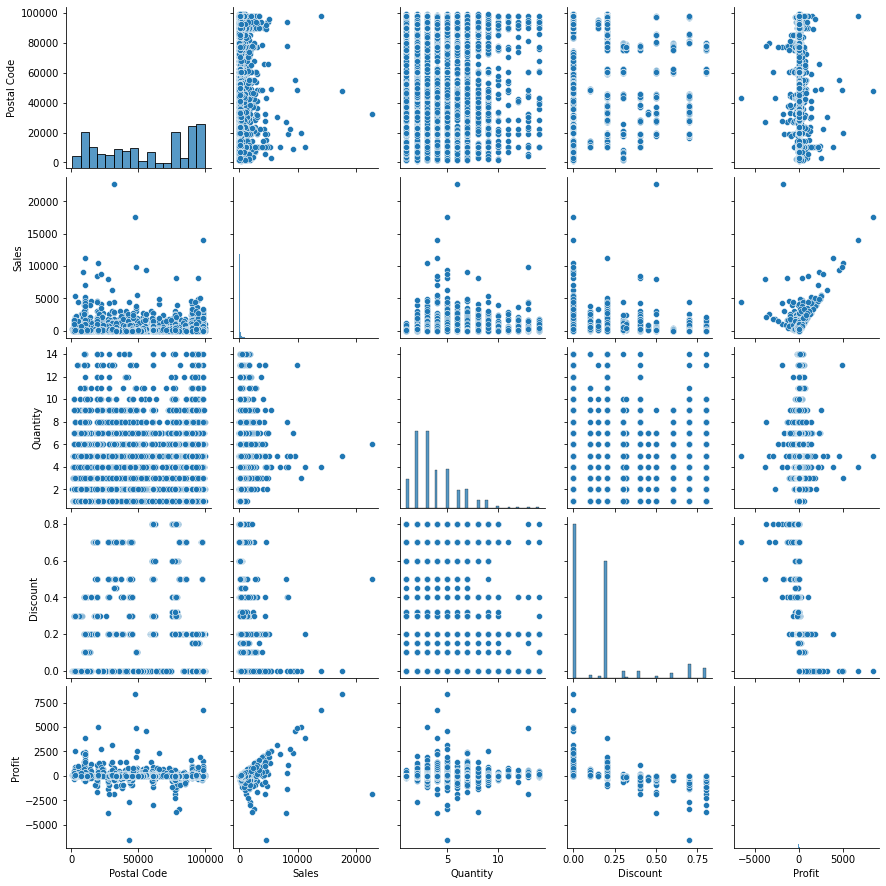

In [ ]:
sns.pairplot(df)
plt.show()

**Sales vs Profit plot we cannot conclude that as number of sales increases there is increase in profit.**

**Profit vs Discount graph we can conclude that the profit is maximum**

**when the discount is minimum and a discount nearly above 30% results in loss.**

**With lower sales there is no certain profit and with higher sales we have higher profits.**

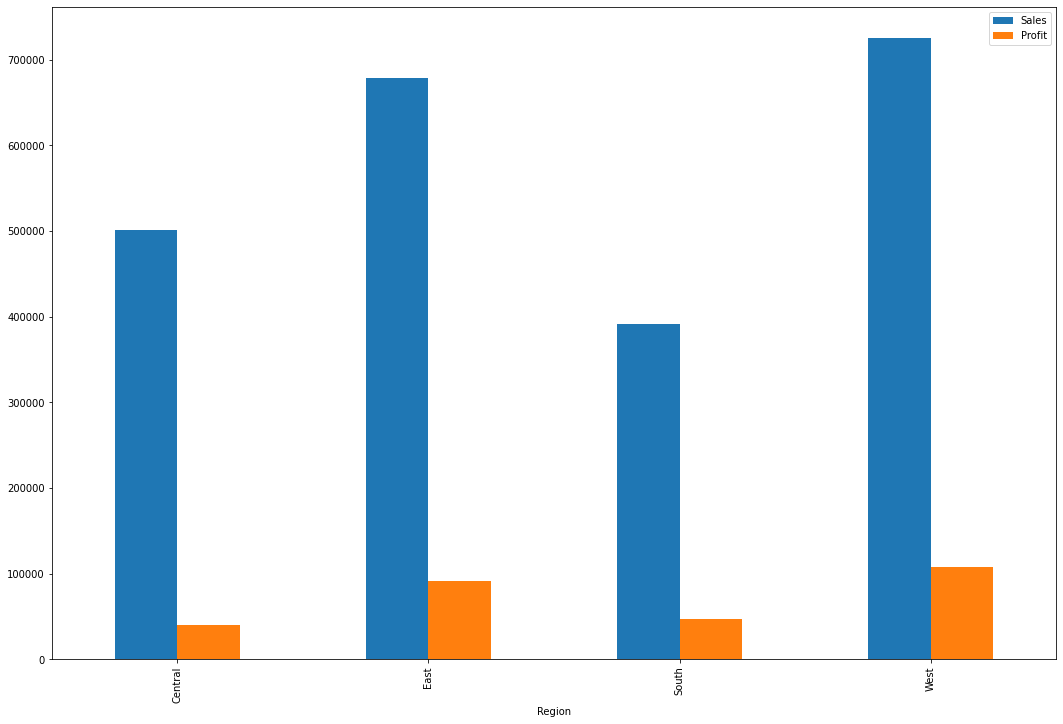

In [ ]:
df.groupby(['Region'])[['Sales','Profit']].sum().plot(kind='bar')

**Higher sales and higher profit shown in west region followed by east region.**

**South region has lowest sales followed by central region which as minimum profit.**

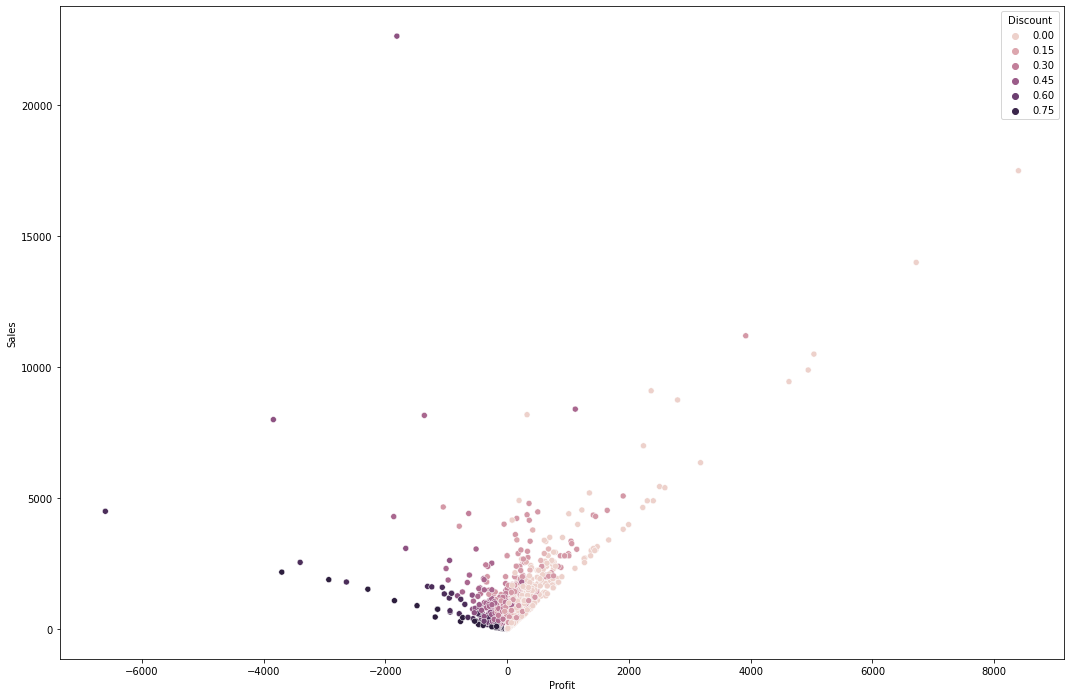

In [ ]:
sns.scatterplot(df['Profit'],df['Sales'],hue=df['Discount'])
plt.show()

**Giving small percentage of discounts like 15% or even 30% are getting good profit almost.**

**The extent of losses goes upto $6k in some businesses as we can see that from the above plot.**



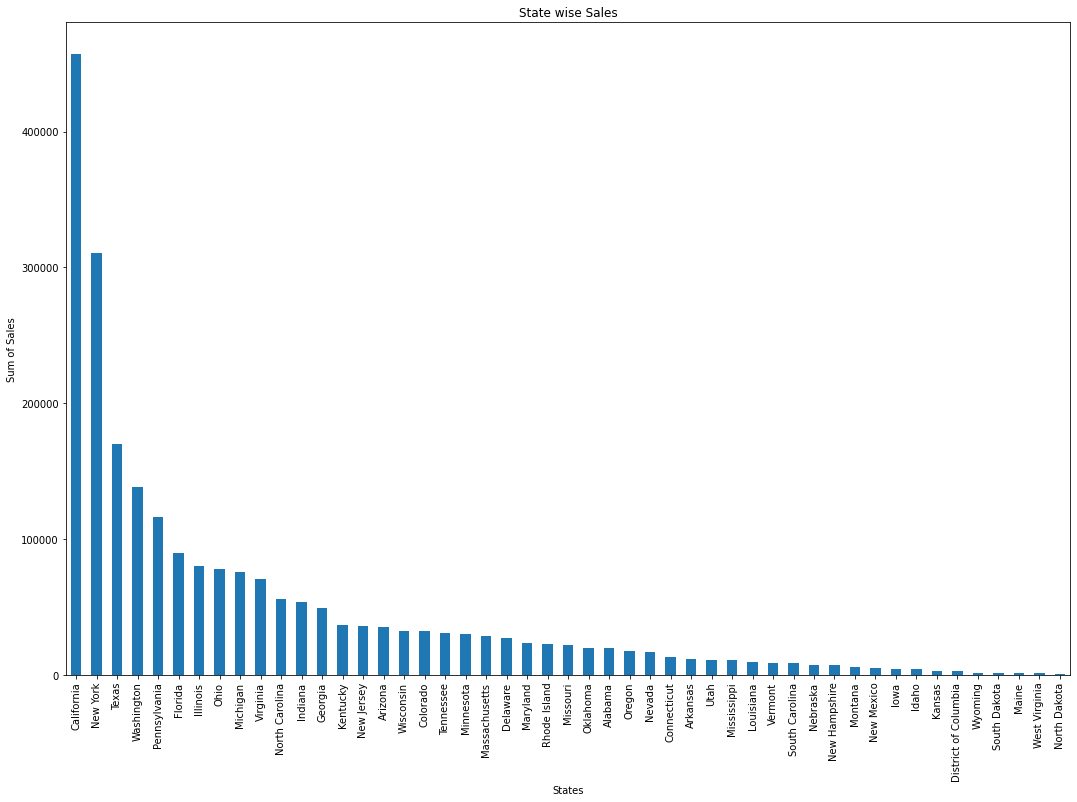

In [ ]:
df_state_sales=df.groupby(['State'])['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise Sales')
plt.xlabel('States')
plt.ylabel('Sum of Sales')
plt.show()

**California has US $ 450k sales which is highest**

**followed by New York with US $ 300k and**

**Texas with US $ 175k.**

**The states of Wyoming, South Dakota, Maine, West Virginia, and North Dakota have comparatively negligible sales.** 

Marketing strategies should be improved in these areas as well as the states with less than USD $ 20k total sales.

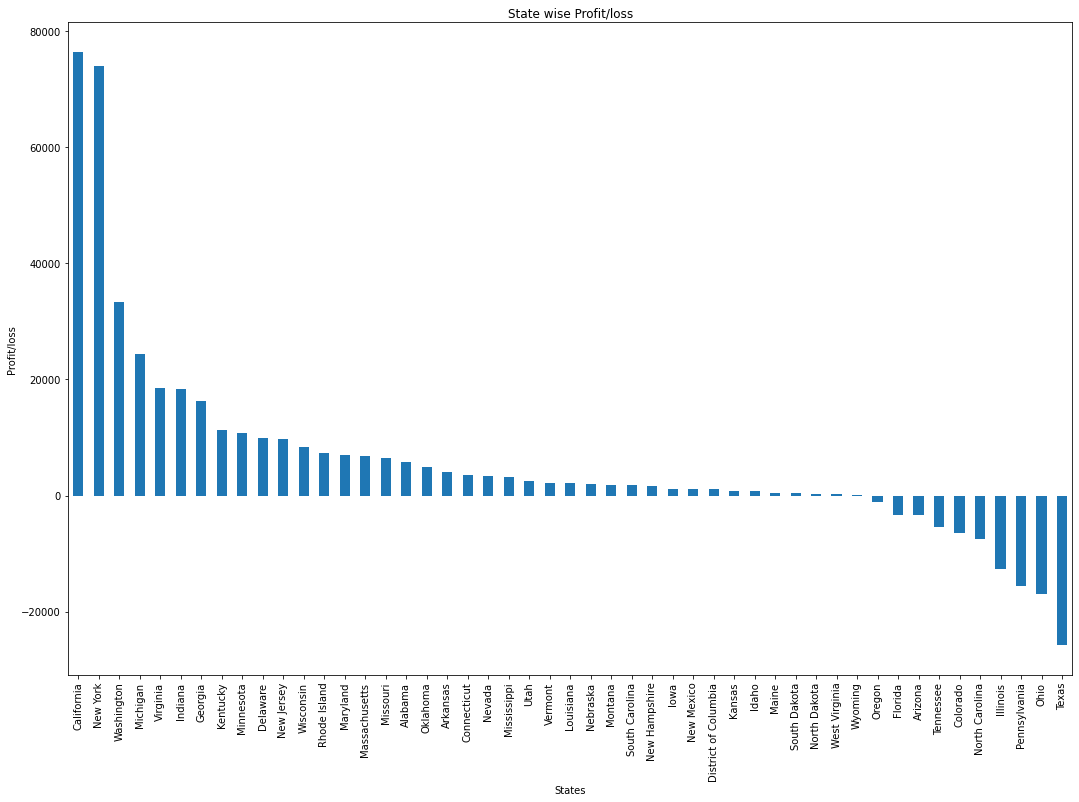

In [ ]:
df_state_profit=df.groupby(['State'])['Profit'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise Profit/loss')
plt.xlabel('States')
plt.ylabel('Profit/loss')
plt.show()


**California has maximium profit followed by New York.**

**Even though Texas is 3rd highest in the form of sales but it has maximium losses,Texas is not at all profitable....as it seems.** 

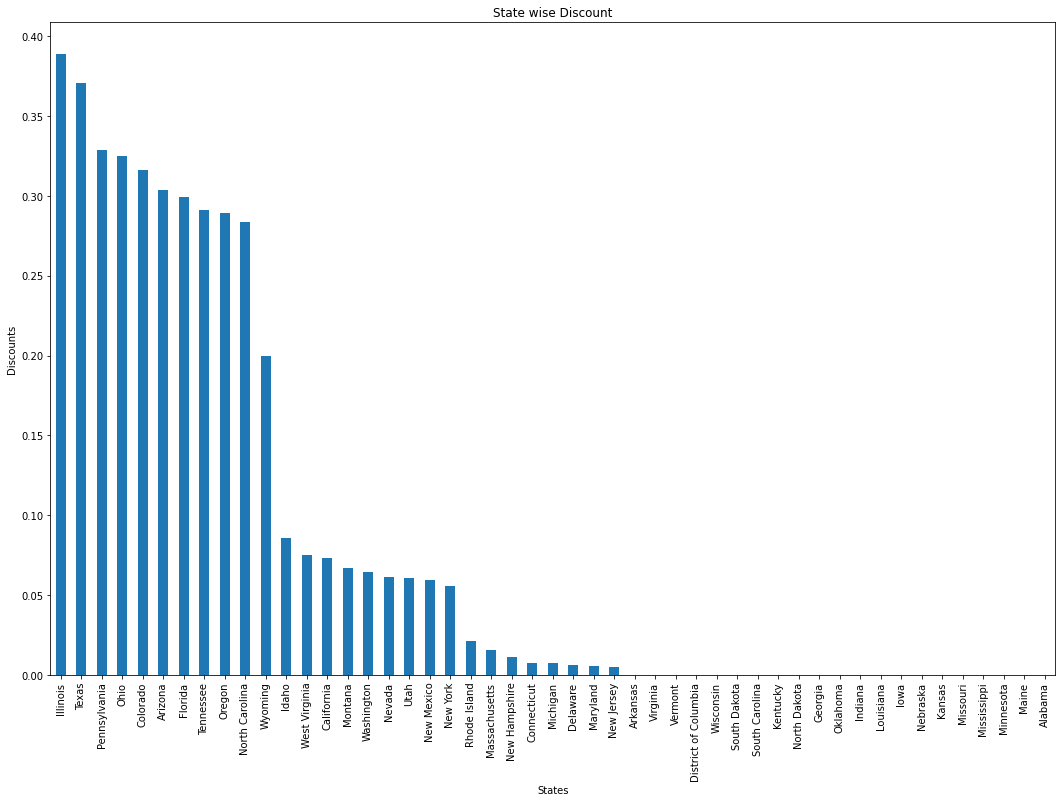

In [ ]:
df_state_sales=df.groupby(['State'])['Discount'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise Discount')
plt.xlabel('States')
plt.ylabel('Discounts')
plt.show()


**Even with the 2nd highest rate of discount on Texas there is no profit generation**

In [ ]:
df_ship=df.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
df_ship

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.614490,0.164587,31.850134
Same Day,236.755950,0.152675,29.283924
Second Class,236.323750,0.138626,29.565956
Standard Class,227.928858,0.160222,27.534715


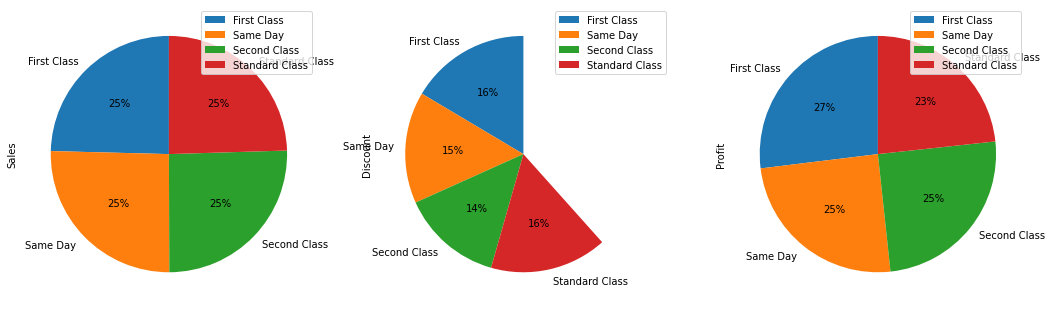

In [ ]:
df_ship.plot.pie(subplots=True,autopct="%1.0f%%",startangle=90)
plt.show()

**1.Profit and Discount is more in First class & Sales is most in Same day ship mode.** 

**2.Profit and Sales is least in Standard class with least discount in Second class.**

In [ ]:
# with respect to segments -
df_seg=df['Segment'].value_counts().sort_index()
df_seg

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

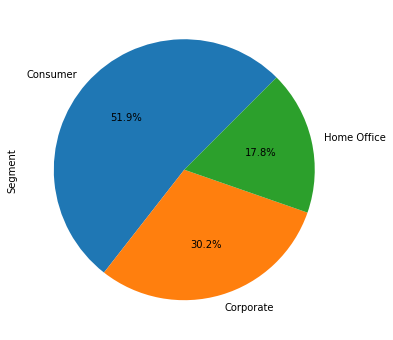

In [ ]:
df_seg.plot.pie(autopct="%1.1f%%",figsize=(10,6),startangle=45)
plt.show()

**Consumer Segment has the most products being sold.**

In [ ]:
df_segm=df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
df_segm


,Sales,Discount,Profit
Segment,,,
Consumer,223.969279,0.158308,25.855188
Corporate,234.185781,0.158159,30.499164
Home Office,241.311234,0.147178,33.883643


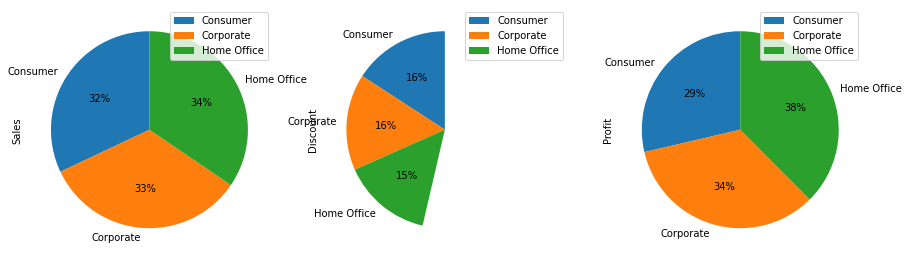

In [ ]:
df_segm.plot.pie(subplots=True,figsize=(15,20),autopct="%1.0f%%",startangle=90)
plt.show()

**Most sales happened in Home Office.**
**Most Discount was given by Consumer and Corporate.**


In [ ]:
df_region=df['Region'].value_counts().sort_index()
df_region

Central    2319
East       2845
South      1620
West       3193
Name: Region, dtype: int64

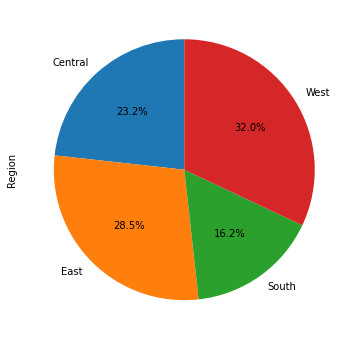

In [ ]:
df_region.plot.pie(autopct="%1.1f%%",figsize=(10,6),startangle=90)
plt.show()

**Profit is more in West region and least in Central region.** 
**Discount is provided more in Central region and lease in West region.**

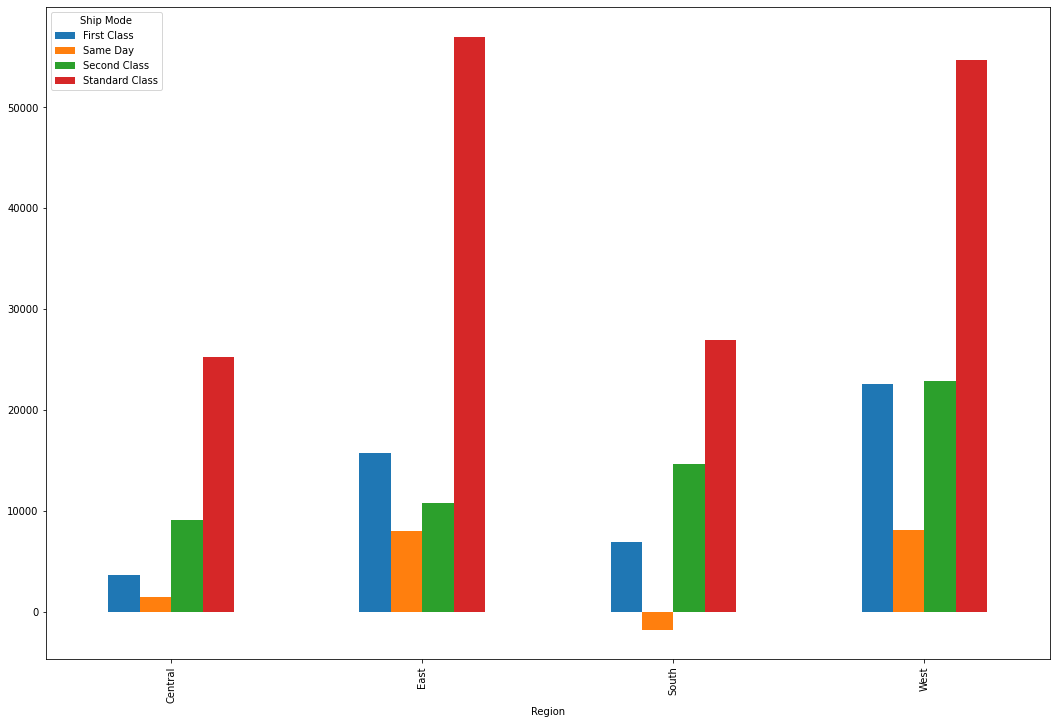

In [ ]:
table=pd.crosstab(index=df['Region'],columns=df['Ship Mode'],values=df['Profit'],aggfunc='sum').plot(kind='bar')
plt.show()

**Out of all of the 4 regions Standard class is the most preferred shipment mode giving the high profits.**

**First class ship mode acquires the 2nd position, with a big trailing gap Shipments going out on the same day of order are showing the lowest profits, the arrangements for the transportation may be the reason.**

**In South shipments on the day of order are going through a loss.**

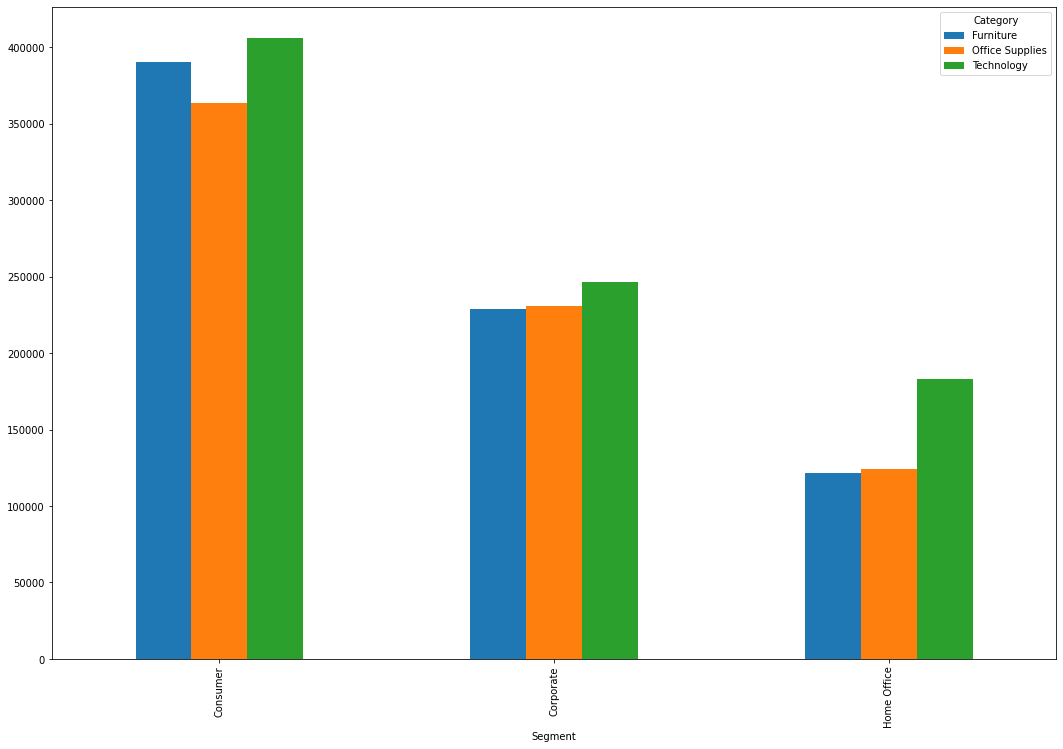

In [ ]:
pd.crosstab(index=df['Segment'],columns=df['Category'],values=df['Sales'],aggfunc='sum').plot(kind='bar')
plt.show()

**All 3 segments have high demand for Technology.**
**Consumers are interested in buying technology products,followed by Furniture and then office supplies.**

**Corporate are interested in Technology products and has equal demand for both office supplies and furniture.**

**Home office has high purchase in technology product but low purchase for both furniture as well as office supplies.**

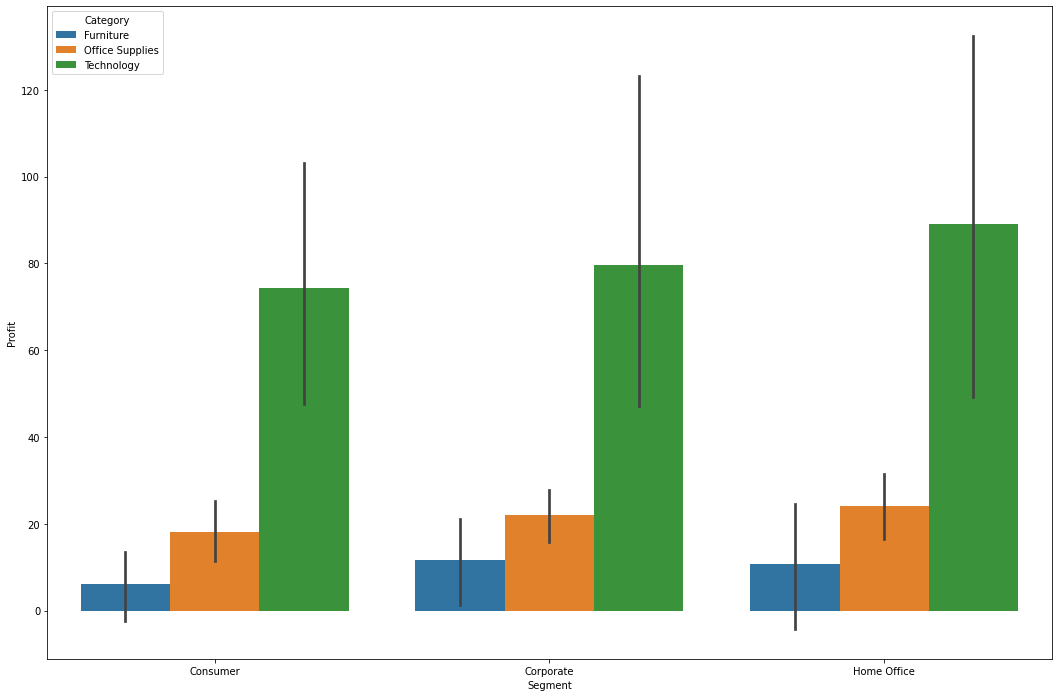

In [ ]:
sns.barplot(data=df,x='Segment',y='Profit',hue='Category')
plt.show()


**From the barplot,** 

**We observe that Home Office Segment has max profits for Technology Category**

**while least of all is the Furniture Category in Consumer Segment.**

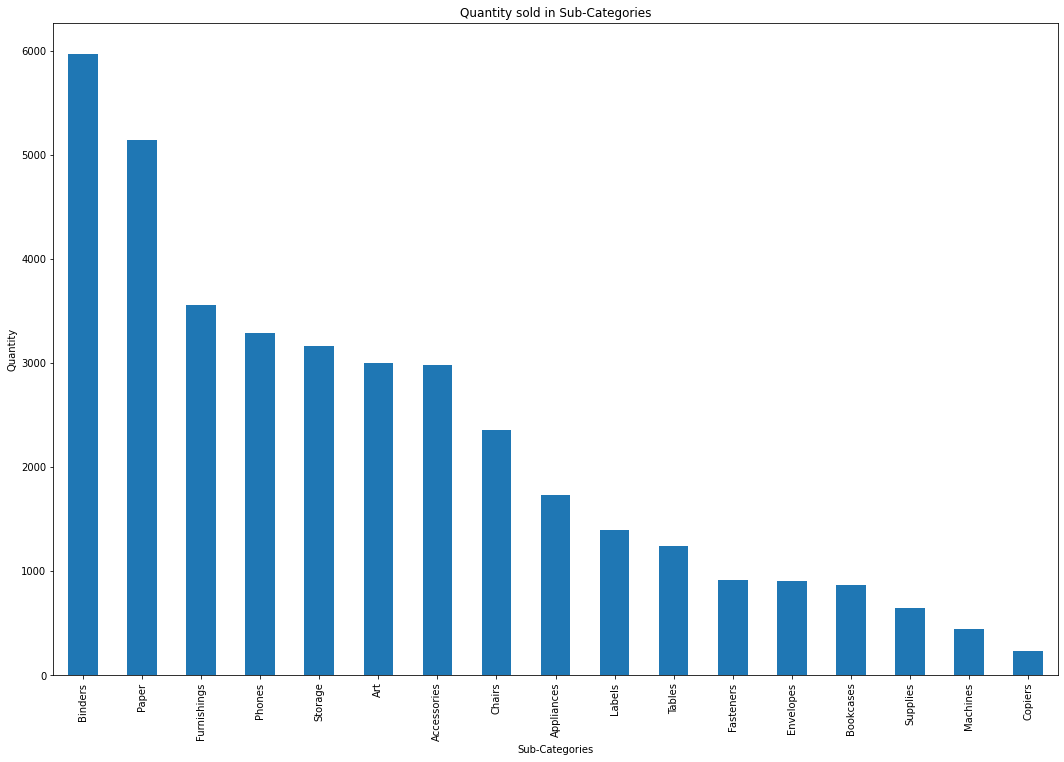

In [ ]:
df_subcategory_deals=df.groupby(['Sub-Category'])['Quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Quantity sold in Sub-Categories')
plt.xlabel('Sub-Categories')
plt.ylabel('Quantity')
plt.show()


**Binders has highest rate of sales with 6000 units.**

**followed by papers above 5000 units,**

**Furnishing around 3500 units,**

**Phones 3200 units approx**

**The copiers,machines,suppliers has quite less needs**

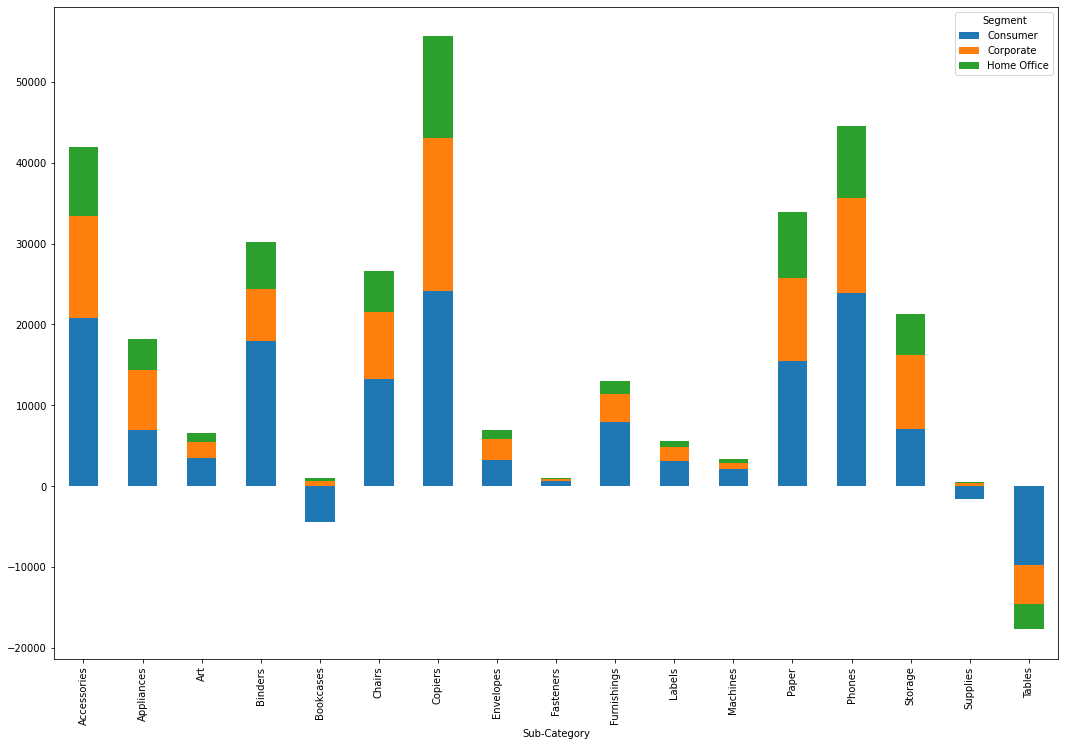

In [ ]:
pd.crosstab(index=df['Sub-Category'],columns=df['Segment'],values=df['Profit'],aggfunc='sum').plot(kind='bar', stacked=True)

**Copiers generate Max Profits.**

**While the Tables generate the Max Losses and mostly in its Consumer Segment.**

**Tables, Supplies and Bookcases should be taken care of in terms of their sales as they are loss making sub-categories.**

In [ ]:
fig=px.sunburst(df,path=['Category','Sub-Category'],values='Sales',color='Category',hover_data=['Sales'])
fig.update_layout(height=650)
fig.show()

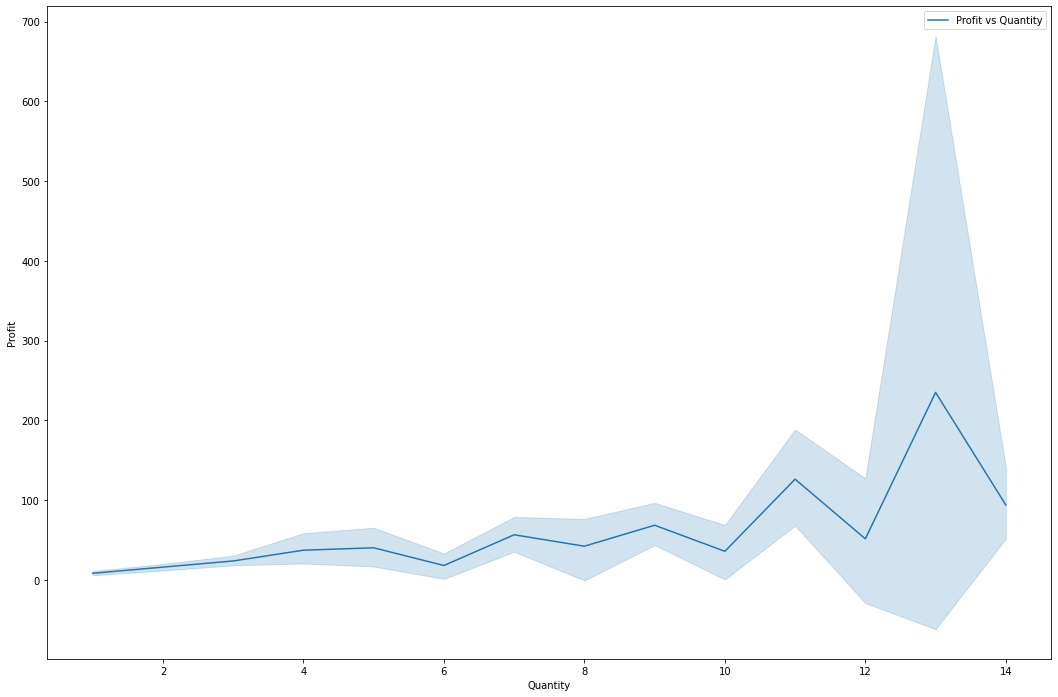

In [ ]:
sns.lineplot(x='Quantity',y='Profit',data=df,label="Profit vs Quantity")
plt.show()

# **OBSERVATIONS / CONCLUSIONS**

---



*   **Consumer Segment has the most products being sold.**
*   **State with highest Sales and Profit is Vermont.**


*   **Discounts above 30% reduces profit.**
*   **The least selling Copiers give maximum profit.**

*   **Even though the more selling category is office supplies, maximum profit comes from Technology.**
*   **Profit from furniture section is very low.**


*   **Standard Class shipping mode has highest profit**.


# **SUGGESTIONS**

---


*   **Keep the discount rate below or equal to 30%.**

*   **Reduce the sales of furniture or increase the price of these items.**

*   **Increase the sale of Copiers to get more profit.**
*   **Increase sales in Technology.**


*   **Promote standard shipping more or increase the cost of same day shipping.**





